### DATA VISUALIZATION



### I. Persiapan Data(Chuẩn bị dữ liệu)




In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import re
import os

%matplotlib inline

sns.set_style('white')


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [57]:
df_items = pd.read_csv('C:\\Users\\acer\\lazada_laptop\\lazada_laptop\\archive\\20191002-items.csv')
df_reviews = pd.read_csv('C:\\Users\\acer\\lazada_laptop\\lazada_laptop\\archive\\20191002-reviews.csv')

#### II. Xác định khung dữ liệu

#### Miêu tả
#### 1. 1. df_items (Mục khung dữ liệu)

In [58]:
#Hiển thị thông tin từ số lượng cột và hàng, cũng như năm mẫu hàng đầu từ khung dữ liệu df_items
print('shape : {}'.format(df_items.shape))
df_items.head()

shape : (10942, 9)


,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02
1,100003785,beli-harddisk-eksternal,"TOSHIBA Full HD Smart LED TV 40"" - 40L5650VJ -...",Toshiba,https://www.lazada.co.id/products/toshiba-full...,3788000,3,3,2019-10-02
2,100004132,beli-harddisk-eksternal,Samsung 40 Inch Full HD Flat LED Digital TV 4...,LG,https://www.lazada.co.id/products/samsung-40-i...,3850000,3,2,2019-10-02
3,100004505,beli-harddisk-eksternal,"Sharp HD LED TV 24"" - LC-24LE175I - Hitam",Sharp,https://www.lazada.co.id/products/sharp-hd-led...,1275000,3,11,2019-10-02
4,100005037,beli-harddisk-eksternal,Lenovo Ideapad 130-15AST LAPTOP MULTIMEDIA I A...,Lenovo,https://www.lazada.co.id/products/lenovo-ideap...,3984100,5,1,2019-10-02


In [59]:
# mô tả món hàng
df_items.describe()

,itemId,price,averageRating,totalReviews
count,1.094200e+04,1.094200e+04,10942.000000,10942.000000
mean,2.936823e+08,3.020219e+06,4.171632,27.369494
std,2.090568e+08,6.681453e+06,1.032055,260.253817
min,6.068000e+03,1.000000e+03,1.000000,1.000000
25%,1.082924e+08,7.920000e+04,4.000000,1.000000
50%,3.540792e+08,1.095000e+06,4.000000,2.000000
75%,4.527141e+08,3.959000e+06,5.000000,7.000000
max,7.242170e+08,2.750000e+08,5.000000,9631.000000


##### 2. df_reviews (Dataframe reviews) 

In [60]:
df_reviews.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [61]:
df_reviews.describe()

,itemId,rating,originalRating,likeCount,upVotes,downVotes,relevanceScore
count,2.037870e+05,203787.000000,8.0,203787.000000,203787.000000,203787.000000,203787.000000
mean,2.836479e+08,4.603238,1.0,0.668634,0.668634,0.164638,25.097394
std,1.726207e+08,0.991164,0.0,12.192433,12.192433,2.013273,9.602434
min,6.068000e+03,1.000000,1.0,-1.000000,-1.000000,0.000000,0.960000
25%,1.600086e+08,5.000000,1.0,0.000000,0.000000,0.000000,18.010000
50%,3.541160e+08,5.000000,1.0,0.000000,0.000000,0.000000,23.510000
75%,4.147421e+08,5.000000,1.0,0.000000,0.000000,0.000000,29.670000
max,7.242170e+08,5.000000,1.0,1776.000000,1776.000000,111.000000,76.500000


#### III. Data Cleaning

In [62]:
##### 1. df_items (Dataframe Items)

In [63]:
#Xem các danh mục hiện có trong df_items.category
df_items.category.value_counts()

beli-harddisk-eksternal    4422
jual-flash-drives          3318
beli-smart-tv              1290
shop-televisi-digital      1211
beli-laptop                 701
Name: category, dtype: int64

In [64]:
#Xem mỗi mục có một hay nhiều danh mục
#loại 1
cat1 = len(pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 1))
print('Satu kategori :', cat1)

#loại 2
cat2 = len(pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 2))
print('Dua kategori :', cat2)

#loại3
cat3 = len(pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 3))
print('Tiga kategori :', cat3)

#loại4
cat4 = len(pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 4))
print('Empat kategori :', cat4)

#loại5
cat5 = len(pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 5))
print('Lima kategori :', cat5)

Satu kategori : 1104
Dua kategori : 4056
Tiga kategori : 237
Empat kategori : 2040
Lima kategori : 3505


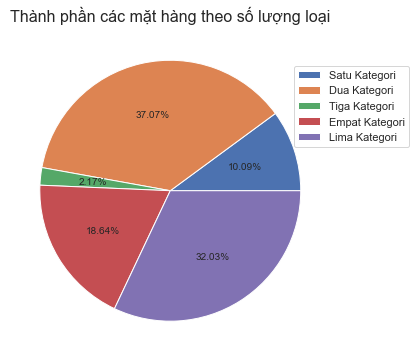

In [65]:
#Hình ảnh hóa biểu đồ hình trònt
cat = np.array([cat1, cat2, cat3, cat4, cat5])
cat_percentile = []
for i in cat:
    x = i/np.sum(cat)
    cat_percentile.append(x)
     

fig, ax = plt.subplots(figsize = (8, 6))

labels = ['Satu Kategori', 'Dua Kategori', 'Tiga Kategori', 'Empat Kategori', 'Lima Kategori']
ax.pie(x = cat_percentile,
       autopct = '%1.2f%%')
ax.set_title(label = 'Thành phần các mặt hàng theo số lượng loại', size = 16)
ax.legend(labels, loc = 'upper right', bbox_to_anchor=(1.25, 0.9))
plt.show()

In [66]:
#Hiển thị các mẫu dữ liệu có số danh mục = 1
df_items_cat1 = pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 1)
df_items_cat1.head()

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
1488,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,https://www.lazada.co.id/products/wd-elements-...,765000,4,17,2019-10-02
1489,19949,beli-harddisk-eksternal,"WD Elements 2.5"" - 2 TB - Hitam",WD,https://www.lazada.co.id/products/wd-elements-...,1088500,4,33,2019-10-02
3241,50409,beli-harddisk-eksternal,"Western Digital Elements 2.5"" USB 3.0 1 TB - H...",WD,https://www.lazada.co.id/products/western-digi...,925955,5,1,2019-10-02
3884,64523,beli-harddisk-eksternal,Sharkoon 5-Bay RAID Box Hard Disk Storage Arra...,Sharkoon,https://www.lazada.co.id/products/sharkoon-5-b...,3500000,5,1,2019-10-02
3897,64971,beli-harddisk-eksternal,﻿Seagate Harddisk Internal PC 320GB SATA,Seagate,https://www.lazada.co.id/products/seagate-hard...,190000,3,10,2019-10-02


In [67]:
#Hiển thị các mẫu dữ liệu có số danh mục = 2
df_items_cat2 = pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 2)

print(df_items_cat2.category.value_counts(), '\n')
df_items_cat2.head(6)

jual-flash-drives          2028
beli-harddisk-eksternal    2028
Name: category, dtype: int64 



,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
2861,44569,beli-harddisk-eksternal,EO TP Usb Hub 7P On Off Led - Putih,EO TP,https://www.lazada.co.id/products/eo-tp-usb-hu...,39400,5,2,2019-10-02
8395,44569,jual-flash-drives,EO TP Usb Hub 7P On Off Led - Putih,EO TP,https://www.lazada.co.id/products/eo-tp-usb-hu...,39400,5,2,2019-10-02
2880,45076,beli-harddisk-eksternal,Adata Flash Disk UV150 - 16gb - USB 3.0 - Hitam,Adata,https://www.lazada.co.id/products/adata-flash-...,79900,5,1,2019-10-02
8411,45076,jual-flash-drives,Adata Flash Disk UV150 - 16gb - USB 3.0 - Hitam,Adata,https://www.lazada.co.id/products/adata-flash-...,79900,5,1,2019-10-02
3140,49780,beli-harddisk-eksternal,Sandisk Cruzer Blade - 16 GB,SanDisk,https://www.lazada.co.id/products/sandisk-cruz...,46000,4,166,2019-10-02
8642,49780,jual-flash-drives,Sandisk Cruzer Blade - 16 GB,SanDisk,https://www.lazada.co.id/products/sandisk-cruz...,46000,4,166,2019-10-02


In [68]:
#Hiển thị các mẫu dữ liệu có số danh mục =  3
df_items_cat3 = pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 3)
print(df_items_cat3.category.value_counts(), '\n')
df_items_cat3.head(6)

jual-flash-drives          79
beli-smart-tv              79
beli-harddisk-eksternal    79
Name: category, dtype: int64 



,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
4332,857971,beli-harddisk-eksternal,LG 3D Smart TV 50LB650T,LG,https://www.lazada.co.id/products/lg-3d-smart-...,18000000,5,1,2019-10-02
6393,857971,beli-smart-tv,LG 3D Smart TV 50LB650T,LG,https://www.lazada.co.id/products/lg-3d-smart-...,18000000,5,1,2019-10-02
9673,857971,jual-flash-drives,LG 3D Smart TV 50LB650T,LG,https://www.lazada.co.id/products/lg-3d-smart-...,18000000,5,1,2019-10-02
1456,1917900,beli-harddisk-eksternal,"LG 42"" Full HD 3D Smart TV - Hitam - 42LA6200",LG,https://www.lazada.co.id/products/lg-42-full-h...,8499000,2,1,2019-10-02
5524,1917900,beli-smart-tv,"LG 42"" Full HD 3D Smart TV - Hitam - 42LA6200",LG,https://www.lazada.co.id/products/lg-42-full-h...,8499000,2,1,2019-10-02
7264,1917900,jual-flash-drives,"LG 42"" Full HD 3D Smart TV - Hitam - 42LA6200",LG,https://www.lazada.co.id/products/lg-42-full-h...,8499000,2,1,2019-10-02


In [69]:
_ = df_items_cat3[~df_items_cat3['name'].str.contains('smart', flags=re.IGNORECASE, regex = True)]
print('Số cột : ', len(_))
_.head()

Số cột :  36


,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
283,104683820,beli-harddisk-eksternal,AQUA LED TV 32 Inch AQT6100 Khusus JATABEK,Aqua,https://www.lazada.co.id/products/aqua-led-tv-...,1615000,5,1,2019-10-02
5209,104683820,beli-smart-tv,AQUA LED TV 32 Inch AQT6100 Khusus JATABEK,Aqua,https://www.lazada.co.id/products/aqua-led-tv-...,1615000,5,1,2019-10-02
6577,104683820,jual-flash-drives,AQUA LED TV 32 Inch AQT6100 Khusus JATABEK,Aqua,https://www.lazada.co.id/products/aqua-led-tv-...,1615000,5,1,2019-10-02
728,124123539,beli-harddisk-eksternal,EELIC TVP-NS169 DVD TV GAME Player Portable Ko...,EELIC,https://www.lazada.co.id/products/eelic-tvp-ns...,850000,3,5,2019-10-02
5326,124123539,beli-smart-tv,EELIC TVP-NS169 DVD TV GAME Player Portable Ko...,EELIC,https://www.lazada.co.id/products/eelic-tvp-ns...,850000,3,5,2019-10-02


In [70]:
#Hiển thị các mẫu dữ liệu có số danh mục =4
df_items_cat4 = pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 4)
print(df_items_cat4.category.value_counts(), '\n')
df_items_cat4.head(8)

jual-flash-drives          510
beli-harddisk-eksternal    510
shop-televisi-digital      510
beli-smart-tv              510
Name: category, dtype: int64 



,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
1586,25844,beli-harddisk-eksternal,"CRYSTAL LED TV 32"" Imagine CTV-3200",Crystal,https://www.lazada.co.id/products/crystal-led-...,3399000,4,2,2019-10-02
5548,25844,beli-smart-tv,"CRYSTAL LED TV 32"" Imagine CTV-3200",Crystal,https://www.lazada.co.id/products/crystal-led-...,3399000,4,2,2019-10-02
7365,25844,jual-flash-drives,"CRYSTAL LED TV 32"" Imagine CTV-3200",Crystal,https://www.lazada.co.id/products/crystal-led-...,3399000,4,2,2019-10-02
10140,25844,shop-televisi-digital,"CRYSTAL LED TV 32"" Imagine CTV-3200",Crystal,https://www.lazada.co.id/products/crystal-led-...,3399000,4,2,2019-10-02
1587,25850,beli-harddisk-eksternal,"CRYSTAL LED TV 24"" Imagine CTV-2924",Crystal,https://www.lazada.co.id/products/crystal-led-...,2450000,3,1,2019-10-02
5549,25850,beli-smart-tv,"CRYSTAL LED TV 24"" Imagine CTV-2924",Crystal,https://www.lazada.co.id/products/crystal-led-...,2450000,3,1,2019-10-02
7366,25850,jual-flash-drives,"CRYSTAL LED TV 24"" Imagine CTV-2924",Crystal,https://www.lazada.co.id/products/crystal-led-...,2450000,3,1,2019-10-02
10141,25850,shop-televisi-digital,"CRYSTAL LED TV 24"" Imagine CTV-2924",Crystal,https://www.lazada.co.id/products/crystal-led-...,2450000,3,1,2019-10-02


In [71]:
keyword = '|'.join(['tv', 'led'])

_ = df_items_cat4[~df_items_cat4['name'].str.contains(keyword, flags=re.IGNORECASE, regex = True)]
print(len(_))
_.head()

100


,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
152,102494885,beli-harddisk-eksternal,JUC KV-2128,JUC,https://www.lazada.co.id/products/juc-kv-2128-...,1200000,5,1,2019-10-02
5183,102494885,beli-smart-tv,JUC KV-2128,JUC,https://www.lazada.co.id/products/juc-kv-2128-...,1200000,5,1,2019-10-02
6521,102494885,jual-flash-drives,JUC KV-2128,JUC,https://www.lazada.co.id/products/juc-kv-2128-...,1200000,5,1,2019-10-02
9789,102494885,shop-televisi-digital,JUC KV-2128,JUC,https://www.lazada.co.id/products/juc-kv-2128-...,1200000,5,1,2019-10-02
171,102744286,beli-harddisk-eksternal,SHARP LC32LE180 (KHUSUS JABODETABEK) untuk ke...,Sharp,https://www.lazada.co.id/products/sharp-lc32le...,1850000,4,6,2019-10-02


In [72]:
#Hiển thị các mẫu dữ liệu có số danh mục  = 5
df_items_cat5 = pd.concat(g for _, g in df_items.groupby(['itemId']) if len(g) == 5)
print(df_items_cat5.category.value_counts(), '\n')
df_items_cat5.head()

jual-flash-drives          701
beli-laptop                701
shop-televisi-digital      701
beli-harddisk-eksternal    701
beli-smart-tv              701
Name: category, dtype: int64 



,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
3741,6068,beli-harddisk-eksternal,Alienware M17xR5 Core i7-4700 - Hitam,Dell,https://www.lazada.co.id/products/alienware-m1...,30737000,5,5,2019-10-02
5040,6068,beli-laptop,Alienware M17xR5 Core i7-4700 - Hitam,Dell,https://www.lazada.co.id/products/alienware-m1...,30737000,5,5,2019-10-02
6258,6068,beli-smart-tv,Alienware M17xR5 Core i7-4700 - Hitam,Dell,https://www.lazada.co.id/products/alienware-m1...,30737000,5,5,2019-10-02
9168,6068,jual-flash-drives,Alienware M17xR5 Core i7-4700 - Hitam,Dell,https://www.lazada.co.id/products/alienware-m1...,30737000,5,5,2019-10-02
10798,6068,shop-televisi-digital,Alienware M17xR5 Core i7-4700 - Hitam,Dell,https://www.lazada.co.id/products/alienware-m1...,30737000,5,5,2019-10-02


In [73]:
#Loại2
df_items_cat2 = df_items_cat2[df_items_cat2['category'] == 'jual-flash-drives']

#Loại3
df_items_cat3 = df_items_cat3[df_items_cat3['category'] == 'beli-smart-tv']

#Loại4
df_items_cat4 = df_items_cat4[df_items_cat4['category'] == 'shop-televisi-digital']

#Loại5
df_items_cat5 = df_items_cat5[df_items_cat5['category'] == 'beli-laptop']

print(df_items_cat1.category.value_counts(),'\n')
print(df_items_cat2.category.value_counts(),'\n')
print(df_items_cat3.category.value_counts(),'\n')
print(df_items_cat4.category.value_counts(),'\n')
print(df_items_cat5.category.value_counts())

beli-harddisk-eksternal    1104
Name: category, dtype: int64 

jual-flash-drives    2028
Name: category, dtype: int64 

beli-smart-tv    79
Name: category, dtype: int64 

shop-televisi-digital    510
Name: category, dtype: int64 

beli-laptop    701
Name: category, dtype: int64


In [74]:
#Hợp nhất các khung dữ liệu
df_items_clean = pd.concat([df_items_cat1, df_items_cat2, df_items_cat3, df_items_cat4, df_items_cat5],
                          axis = 0)
df_items_clean.reset_index(drop= True, inplace = True)
print(df_items_clean.info(), '\n')
print(df_items_clean.category.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   itemId         4422 non-null   int64 
 1   category       4422 non-null   object
 2   name           4422 non-null   object
 3   brandName      4420 non-null   object
 4   url            4422 non-null   object
 5   price          4422 non-null   int64 
 6   averageRating  4422 non-null   int64 
 7   totalReviews   4422 non-null   int64 
 8   retrievedDate  4422 non-null   object
dtypes: int64(4), object(5)
memory usage: 311.0+ KB
None 

jual-flash-drives          2028
beli-harddisk-eksternal    1104
beli-laptop                 701
shop-televisi-digital       510
beli-smart-tv                79
Name: category, dtype: int64


In [75]:
#Hiển thị các hàng có brandName null
df_items_clean[df_items_clean['brandName'].isnull()]

#Đã thay đổi thương hiệu rỗng Tên thành WD
df_items_clean.brandName.fillna('WD', inplace = True)

#Xóa cột Ngày đã truy xuất
df_items_clean = df_items_clean.drop('retrievedDate', axis = 1)

print(df_items_clean.info(), '\n')
print(df_items_clean.category.value_counts(), '\n')
df_items_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   itemId         4422 non-null   int64 
 1   category       4422 non-null   object
 2   name           4422 non-null   object
 3   brandName      4422 non-null   object
 4   url            4422 non-null   object
 5   price          4422 non-null   int64 
 6   averageRating  4422 non-null   int64 
 7   totalReviews   4422 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 276.5+ KB
None 

jual-flash-drives          2028
beli-harddisk-eksternal    1104
beli-laptop                 701
shop-televisi-digital       510
beli-smart-tv                79
Name: category, dtype: int64 



,itemId,category,name,brandName,url,price,averageRating,totalReviews
0,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,https://www.lazada.co.id/products/wd-elements-...,765000,4,17
1,19949,beli-harddisk-eksternal,"WD Elements 2.5"" - 2 TB - Hitam",WD,https://www.lazada.co.id/products/wd-elements-...,1088500,4,33
2,50409,beli-harddisk-eksternal,"Western Digital Elements 2.5"" USB 3.0 1 TB - H...",WD,https://www.lazada.co.id/products/western-digi...,925955,5,1
3,64523,beli-harddisk-eksternal,Sharkoon 5-Bay RAID Box Hard Disk Storage Arra...,Sharkoon,https://www.lazada.co.id/products/sharkoon-5-b...,3500000,5,1
4,64971,beli-harddisk-eksternal,﻿Seagate Harddisk Internal PC 320GB SATA,Seagate,https://www.lazada.co.id/products/seagate-hard...,190000,3,10


##### 2. df_reviews (Dataframe reviews)

In [76]:
#hiển thị 5 dòng hàng đầu của df_reviews
df_reviews.head()


,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [77]:
#Lấy 1 mặt hàng làm mẫu để xem xét kỹ lưỡng
df_reviews[df_reviews['itemId'] == 100002528]

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
5,100002528,beli-harddisk-eksternal,Deden,5,NaN,NaN,NaN,0,0,0,True,16.01,02 Nov 2017,androidApp,2019-10-02
6,100002528,beli-harddisk-eksternal,Yeana,5,NaN,NaN,NaN,0,0,0,True,13.01,25 Sep 2017,mobile,2019-10-02
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,2019-10-02
88004,100002528,beli-smart-tv,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
88005,100002528,beli-smart-tv,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02


In [78]:
df_reviews_clean = df_reviews[df_reviews.set_index(['itemId', 'category']).index.isin(df_items_clean.set_index(['itemId', 'category']).index)]
print(df_reviews_clean.shape, '\n')
df_reviews_clean.head()

(82190, 15) 



,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
61,100027329,beli-harddisk-eksternal,Yoga T.,5,NaN,Sesuai Dengan yang tertera,"Kapasitas HDD asli 1 TB, dan tanpa ada lecet d...",2,2,0,True,23.30,02 Mei 2017,desktop,2019-10-02
62,100027329,beli-harddisk-eksternal,Heri K.,5,NaN,mantap,barang sesuai dengan gambar,0,0,0,True,20.21,20 Jun 2017,desktop,2019-10-02
63,100027329,beli-harddisk-eksternal,Lazada Guest,4,NaN,Respon penjualan yg baik,"HD diterima dg packing bubble bagus, hanya tid...",1,1,0,True,19.99,NaN,mobile-app,2019-10-02
68,100028438,beli-harddisk-eksternal,Dimas D.,5,NaN,Kepuasan & Ketidakpuasan,"Saya sangat puas dengan barang.nya, kualitas b...",0,0,0,True,27.00,25 Feb 2017,mobile-app,2019-10-02
69,100028438,beli-harddisk-eksternal,Pembeli,4,NaN,Bagus,Barang diterima dengan kondisi yang baik tapi ...,0,0,0,True,20.51,19 Des 2017,iosApp,2019-10-02


In [79]:
x = df_items_clean[df_items_clean['itemId'] == 100002528]
print(len(df_reviews_clean[df_reviews_clean['itemId'] == 100002528]))
y = df_reviews_clean[df_reviews_clean['itemId'] == 100002528]

#Kiểm tra xem tổng đánh giá của một mục có khớp với số dòng đánh giá hay không
if x.totalReviews.item() == len(y):
    print(True)
else:
    print(False)

8
True


In [80]:
#Kiểm tra xem cột likeCount và upVotes có cùng giá trị hay không
print(df_reviews_clean.likeCount.equals(df_reviews_clean.upVotes))

True


In [81]:
#Loại bỏ các cột originalRating, likeCount, đã truy xuất
df_reviews_clean = df_reviews_clean.drop(columns=['originalRating', 'likeCount', 'retrievedDate'])
df_reviews_clean.head()

,itemId,category,name,rating,reviewTitle,reviewContent,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType
61,100027329,beli-harddisk-eksternal,Yoga T.,5,Sesuai Dengan yang tertera,"Kapasitas HDD asli 1 TB, dan tanpa ada lecet d...",2,0,True,23.30,02 Mei 2017,desktop
62,100027329,beli-harddisk-eksternal,Heri K.,5,mantap,barang sesuai dengan gambar,0,0,True,20.21,20 Jun 2017,desktop
63,100027329,beli-harddisk-eksternal,Lazada Guest,4,Respon penjualan yg baik,"HD diterima dg packing bubble bagus, hanya tid...",1,0,True,19.99,NaN,mobile-app
68,100028438,beli-harddisk-eksternal,Dimas D.,5,Kepuasan & Ketidakpuasan,"Saya sangat puas dengan barang.nya, kualitas b...",0,0,True,27.00,25 Feb 2017,mobile-app
69,100028438,beli-harddisk-eksternal,Pembeli,4,Bagus,Barang diterima dengan kondisi yang baik tapi ...,0,0,True,20.51,19 Des 2017,iosApp


In [82]:
print('Jumlah NaN value pada reviewTitle : ', len(df_reviews_clean[df_reviews_clean.reviewTitle.isna() == True]))

#Giá trị NaN thay thế
df_reviews_clean.reviewTitle.fillna('Tanpa Judul', inplace = True)
print('Jumlah NaN value pada reviewTitle : ', len(df_reviews_clean[df_reviews_clean.reviewTitle.isna() == True]))

Jumlah NaN value pada reviewTitle :  71847
Jumlah NaN value pada reviewTitle :  0


In [83]:
df_reviews_clean[df_reviews_clean.boughtDate.isna() == True].head()

,itemId,category,name,rating,reviewTitle,reviewContent,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType
63,100027329,beli-harddisk-eksternal,Lazada Guest,4,Respon penjualan yg baik,"HD diterima dg packing bubble bagus, hanya tid...",1,0,True,19.99,NaN,mobile-app
70,100028438,beli-harddisk-eksternal,KHAIRUNNISA.SYAN,5,SESUIA DENGAN FOTO,"Suka banget sama barangnya packing nya rapi, p...",0,0,True,17.55,NaN,mobile-app
431,100169437,beli-harddisk-eksternal,Kusnadi,5,WD My passport 1TB,Mantab.... Reseller nya... Pengiriman cepat da...,0,0,True,17.56,NaN,mobile-app
631,100580784,beli-harddisk-eksternal,Fitria W.,5,Makasih kak,Tengkyuu.... Barangnya nyampe tepat waktu.... ...,0,0,True,10.18,NaN,mobile-app
637,100582501,beli-harddisk-eksternal,harry d.,5,GOOD,"Jum'at pesan besoknya nyampai, Barang bagus, ...",0,0,True,10.13,NaN,mobile-app


##### 3. df_merged (Merged Dataframe)

In [84]:
df_merged = pd.merge(df_items_clean, df_reviews_clean, left_on='itemId', right_on='itemId')\
                    .drop(['category_y', 'helpful', 'url'], axis = 1)\
                    .rename(columns = {'name_y' : 'reviewer',
                                       'name_x' : 'name',
                                       'category_x' : 'category'})
                                       
print(df_merged.shape)
df_merged.head()

(82190, 16)


,itemId,category,name,brandName,price,averageRating,totalReviews,reviewer,rating,reviewTitle,reviewContent,upVotes,downVotes,relevanceScore,boughtDate,clientType
0,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Wandi S.,5,Tanpa Judul,"packing nya rapih, udah sya coba lancar.. smog...",0,0,29.51,19 Des 2018,androidApp
1,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Lazada Customer,5,Tanpa Judul,Biar bintang yang bicara,0,0,25.51,17 Apr 2017,androidApp
2,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Lazada Customer,4,Tanpa Judul,"Pengiriman sangat cepat, paket dan barang sang...",0,0,24.51,05 Agu 2017,androidApp
3,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Chaerul U.,5,Tanpa Judul,produk yang sesuai pesanan. pembeli yang ramah,0,0,23.50,12 Des 2017,androidApp
4,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Hendra P.,5,Tanpa Judul,NaN,0,0,18.01,18 Jan 2016,androidApp


#### III. Visualisasi Data(Trực quan hóa dữ liệu)

<ipython-input-85-935548b98838>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
<ipython-input-85-935548b98838>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize = 16)


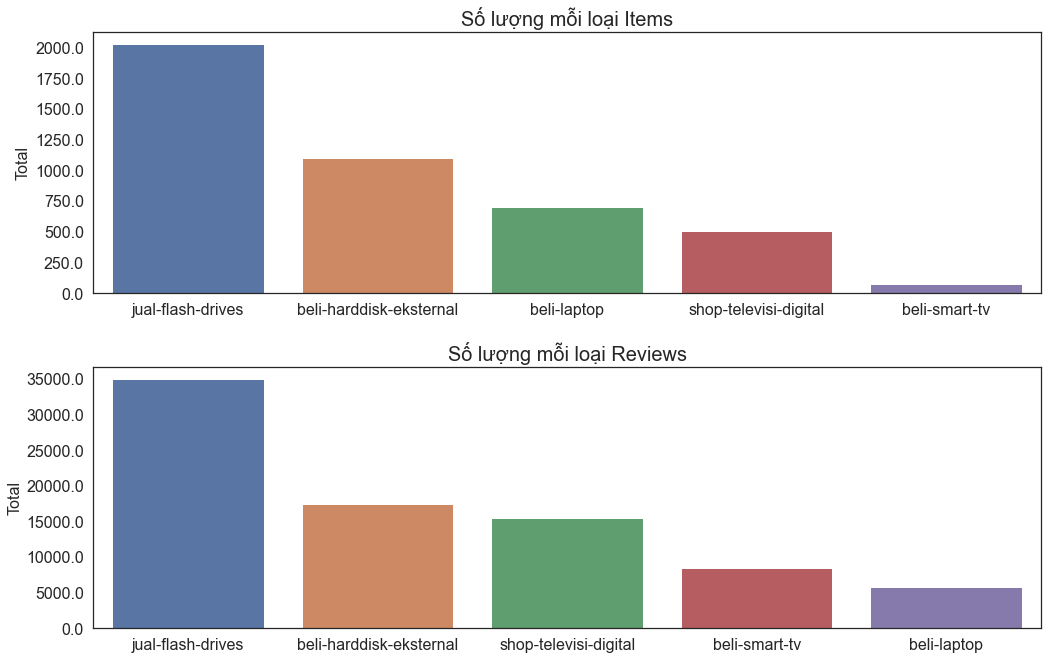

In [85]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
fig.tight_layout(pad = 5)

for ax, i, title in zip(ax.flatten(), [df_items_clean, df_reviews_clean], ['Items', 'Reviews']):
    #count = i.category.value_counts()
    index = i.category.value_counts().index
    
    sns.countplot(ax = ax, data = i, x = i.category, order = index)
    ax.set_title('Số lượng mỗi loại {}'.format(title), fontsize = 20)
    ax.set_ylabel('Total', fontsize = 16)
    ax.set_xticklabels(i.category.value_counts().index, fontsize = 16)
    ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
    ax.set_xlabel('')
plt.show()

10 thương hiệu có số lượng mặt hàng cao nhất từ ​​mỗi danh mục trên df_items_clean

<ipython-input-86-695fe4315c71>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
<ipython-input-86-695fe4315c71>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
<ipython-input-86-695fe4315c71>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
<ipython-input-86-695fe4315c71>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
<ipython-input-86-695fe4315c71>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize = 16)


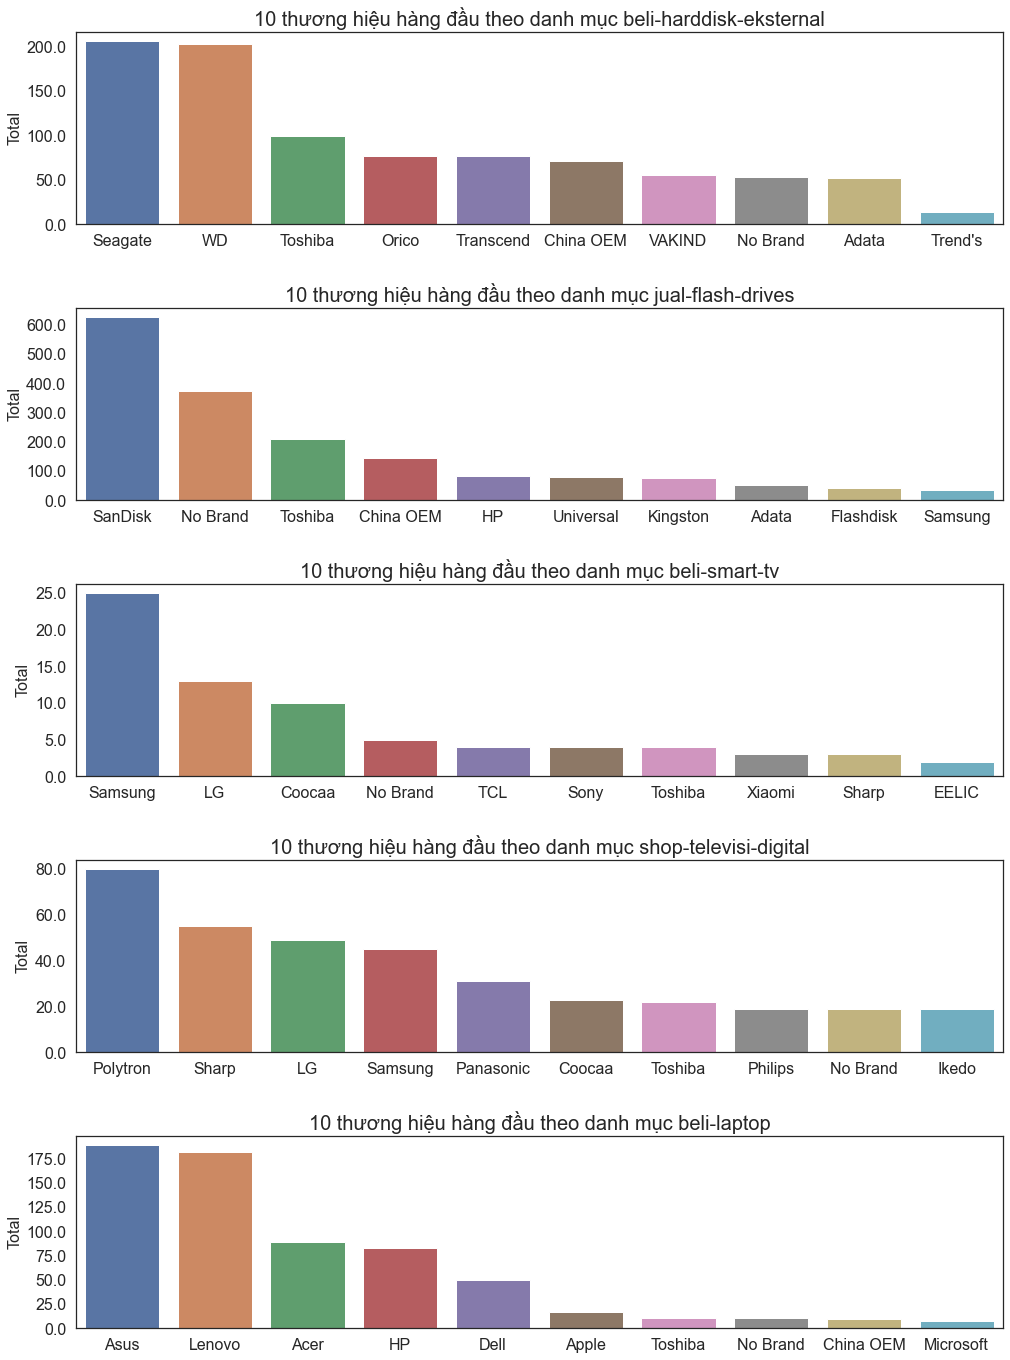

In [86]:
catlist = df_items_clean.category.unique()


fig, ax = plt.subplots(len(catlist), figsize = (15, 20))
fig.tight_layout(pad = 6)

for ax, i in zip(ax.flatten(), catlist):
    index = df_items_clean[df_items_clean['category'] == i]['brandName'].value_counts()
    
    sns.set_style('whitegrid')
    sns.countplot(ax = ax, data = df_items_clean, x = df_items_clean[df_items_clean['category'] == i]['brandName'], 
                  order = index.sort_values(ascending = False).index[:10])
    ax.set_title('10 thương hiệu hàng đầu theo danh mục {}'.format(i), fontsize = 20)
    ax.set_ylabel('Total', fontsize = 16)
    ax.set_xticklabels(index.sort_values(ascending = False).index[:10], fontsize = 16)
    ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
    ax.set_xlabel('')
plt.show()

Trực quan hóa ClientType

<ipython-input-87-74f3d01e1693>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize = 16)


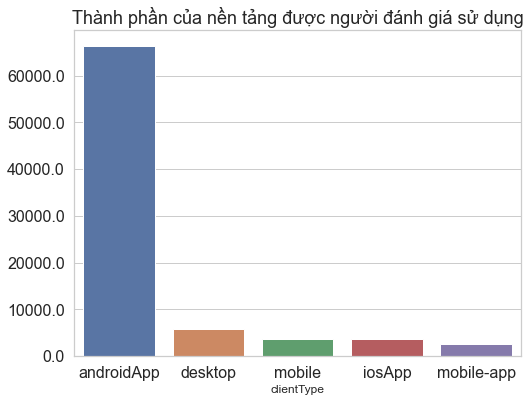

In [87]:
fig, ax = plt.subplots(figsize = (8, 6))

index = df_merged.clientType.value_counts().sort_values(ascending = False).index
sns.countplot(data = df_merged, x = 'clientType', order = index)
ax.set_title('Thành phần của nền tảng được người đánh giá sử dụng', fontsize = 18)
ax.set_ylabel('')
ax.set_xticklabels(index, fontsize = 16)
ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
plt.show()

Chức năng thay thế các tick rất lớn (nghìn, triệu, tỷ) thành K, M và B

In [88]:
#Định dạng giá trị lớn
def large_tick_format(tick_value, pos):
    '''
   Thay đổi các tick có giá trị rất lớn (Hàng tỷ, Hàng triệu, Hàng nghìn) thành
     B, M, K
    '''
    if tick_value >= 1000000000:
        value = round(tick_value/1000000000, 1)
        new_tick_format = '{:}B'.format(value)
    elif tick_value >= 1000000:
        value = round(tick_value/1000000, 1)
        new_tick_format = '{:}M'.format(value)
    elif tick_value >= 1000:
        new_tick_format = '{:}K'.format(value)
    elif tick_value < 1000:
        new_tick_format = round(tick_value, 1)
    else:
        new_tick_format = tick_value
    
    #Chuyển đổi new_tick_format dưới dạng chuỗi
    new_tick_format = str(new_tick_format)
    
    #Đã thay đổi giá trị mẫu 5,0 M thành 5 M
    decimal = new_tick_format.find('.')
    
    if decimal != -1:
        value_after_decimal = new_tick_format[decimal + 1]
        if value_after_decimal == '0':
            #xóa 0 sau số thập phân
            new_tick_format = new_tick_format[0:decimal] + new_tick_format[decimal + 2:]
    
    return new_tick_format

Phân bổ giá của 10 thương hiệu có số lượng cao nhất dựa trên từng danh mục

C:\Users\acer\anaconda 3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda 3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda 3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda 3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda 3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.1% of the points

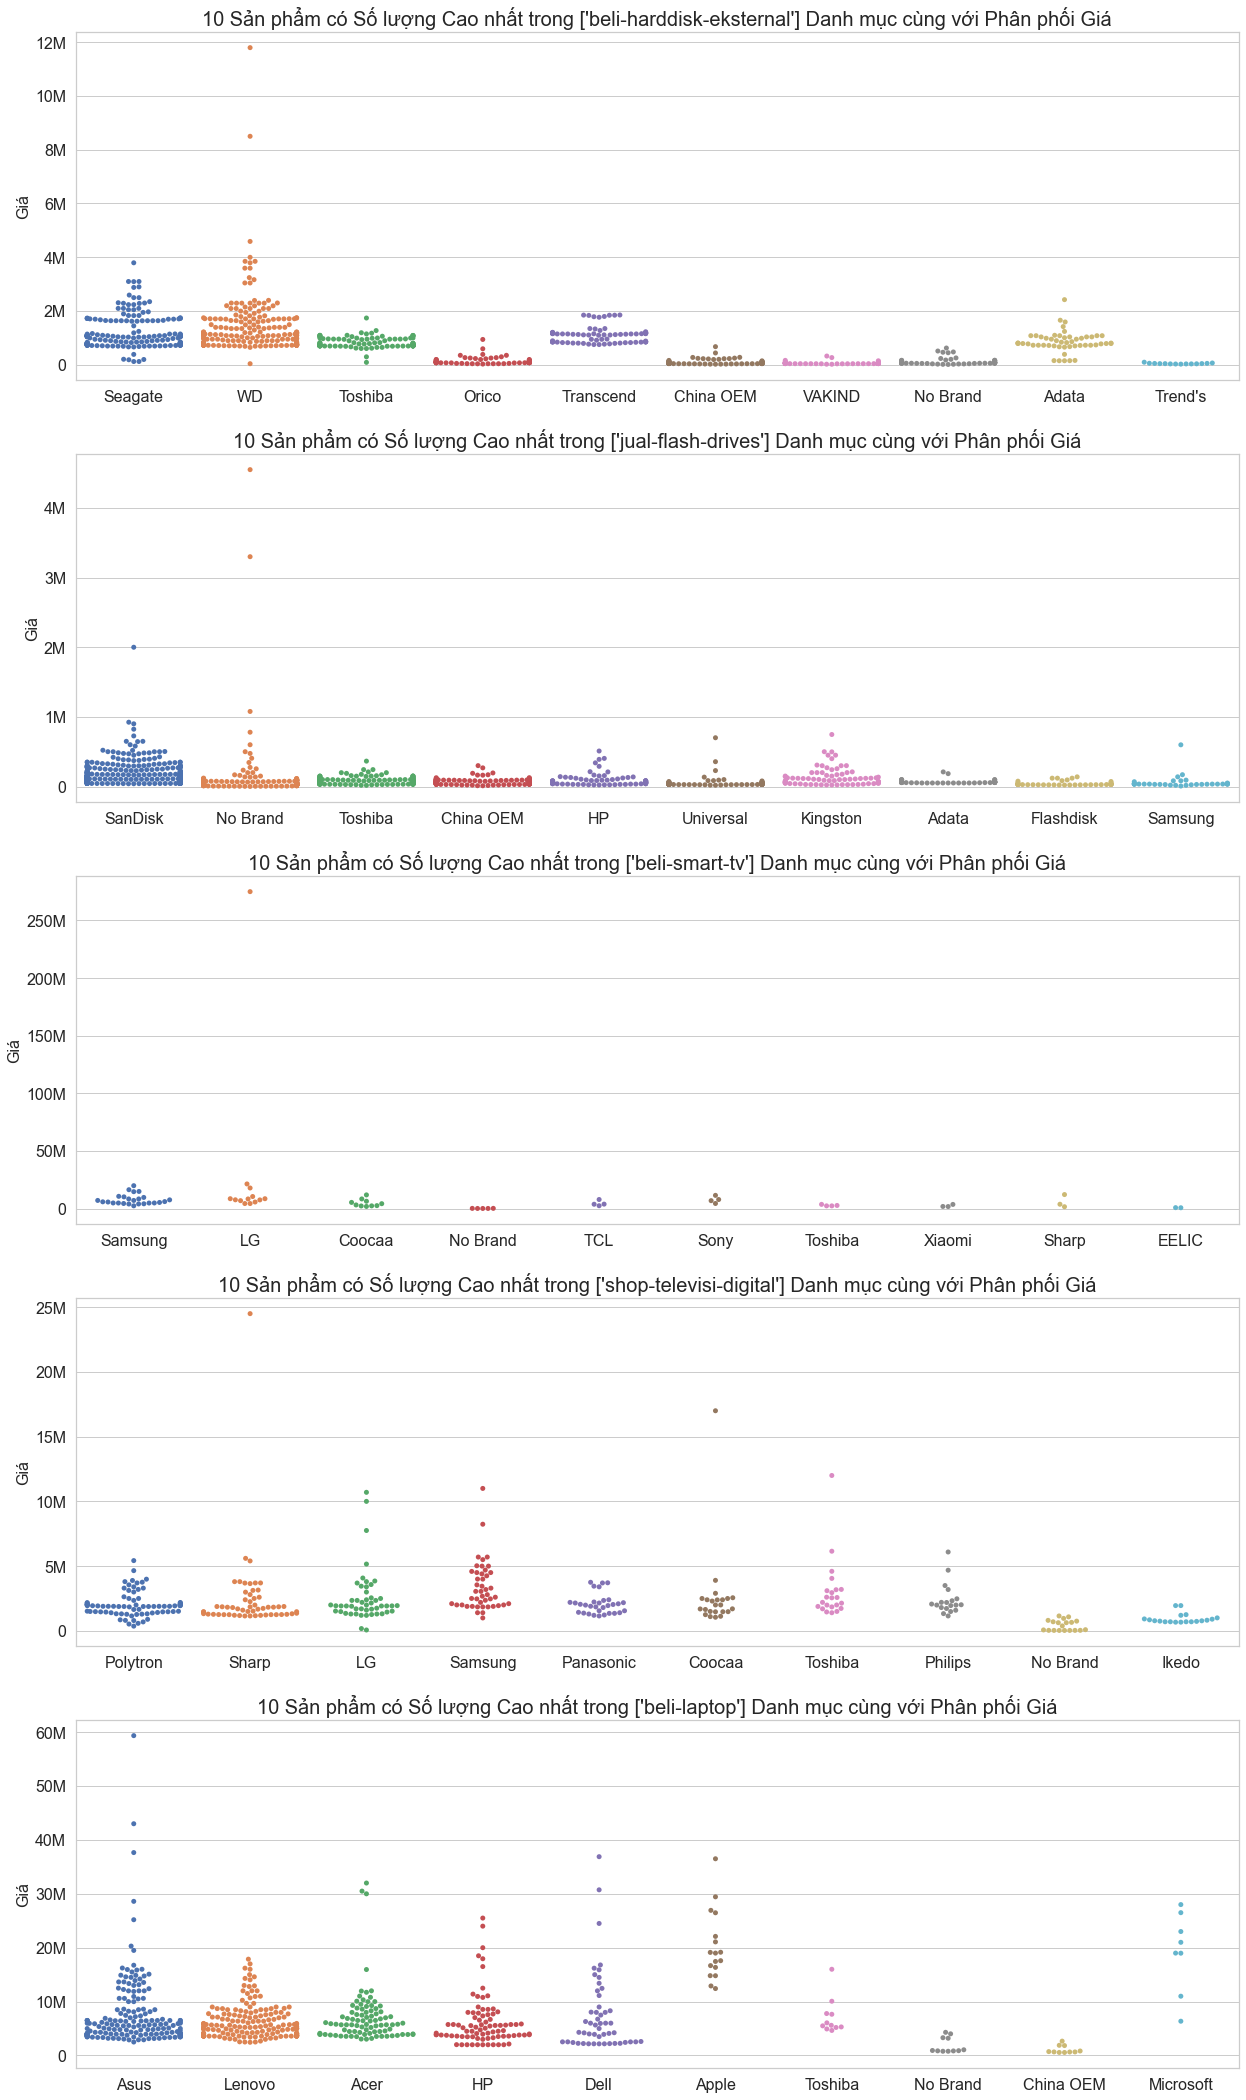

In [89]:
dfcat_list = [df_items_cat1, df_items_cat2, df_items_cat3, df_items_cat4, df_items_cat5]
cat = df_items_clean.category.unique()

fig, ax = plt.subplots(len(dfcat_list), figsize = (18, 30))
fig.tight_layout(pad = 5)
sns.set(font_scale = 1)

for ax, i in zip(ax.flatten(), dfcat_list):
    value = i.brandName.value_counts().sort_values(ascending = False).index[:10]
    x_data = i[i['brandName'].isin(value)]
    
    sns.swarmplot(ax = ax, data = x_data, x = x_data['brandName'], y = x_data['price'],
                order = value)
    ax.set_title('10 Sản phẩm có Số lượng Cao nhất trong {} Danh mục cùng với Phân phối Giá'.format(i.category.unique()), fontsize = 20)
    ax.set_ylabel('Giá', fontsize = 16)
    ax.set_xlabel('')
    ax.set_xticklabels(value, size = 16)
    ax.set_yticklabels(ax.get_yticks(), size = 16)
    ax.yaxis.set_major_formatter(tick.FuncFormatter(large_tick_format))
    
plt.show()

### Phân tích chuỗi thời gian

In [90]:
#Thay đổi cột Ngày mua trong df_merged thành kiểu dữ liệu ngày giờ
month = {'Jan': '01', 'Feb' : '02', 'Mar' : '03', 'Apr' : '04', 'Mei' : '05',
            'Jun' : '06', 'Jul' : '07', 'Agu' : '08', 'Sep' : '09', 'Okt' : '10', 'Nov' : '11', 'Des' : '12', ' ' : '-'}

df_merged.boughtDate.replace(month, regex = True, inplace = True)
df_merged.boughtDate = pd.to_datetime(df_merged.boughtDate, format='%d-%m-%Y')
df_merged.head()

,itemId,category,name,brandName,price,averageRating,totalReviews,reviewer,rating,reviewTitle,reviewContent,upVotes,downVotes,relevanceScore,boughtDate,clientType
0,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Wandi S.,5,Tanpa Judul,"packing nya rapih, udah sya coba lancar.. smog...",0,0,29.51,2018-12-19,androidApp
1,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Lazada Customer,5,Tanpa Judul,Biar bintang yang bicara,0,0,25.51,2017-04-17,androidApp
2,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Lazada Customer,4,Tanpa Judul,"Pengiriman sangat cepat, paket dan barang sang...",0,0,24.51,2017-08-05,androidApp
3,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Chaerul U.,5,Tanpa Judul,produk yang sesuai pesanan. pembeli yang ramah,0,0,23.50,2017-12-12,androidApp
4,19946,beli-harddisk-eksternal,"WD Elements 2.5"" - 1 TB - Hitam",WD,765000,4,17,Hendra P.,5,Tanpa Judul,NaN,0,0,18.01,2016-01-18,androidApp


In [91]:
df_merged = df_merged.dropna(subset = ['boughtDate'], axis = 0)
df_merged[df_merged['boughtDate'].isna()]

,itemId,category,name,brandName,price,averageRating,totalReviews,reviewer,rating,reviewTitle,reviewContent,upVotes,downVotes,relevanceScore,boughtDate,clientType


In [92]:
#Tạo khung dữ liệu mới với các cột đã chọn

df_merged_ts = df_merged[['boughtDate', 'price']]
df_merged_ts = df_merged_ts.set_index('boughtDate')
df_merged_ts.sort_index(inplace = True)
df_merged_ts.head()

,price
boughtDate,
2014-04-19,2450000
2014-05-25,150000
2014-06-16,150000
2014-06-19,71000
2014-06-20,150000


In [93]:
#Tạo một cột mới = count
df_merged_ts.insert(column = 'count', value = 1, loc = 1)
print(df_merged_ts.shape)
df_merged_ts.head()

(79558, 2)


,price,count
boughtDate,,
2014-04-19,2450000,1
2014-05-25,150000,1
2014-06-16,150000,1
2014-06-19,71000,1
2014-06-20,150000,1


In [94]:
#Chi tiết kho dữ liệu
df_merged_ts['year'] = df_merged_ts.index.year
df_merged_ts['month'] = df_merged_ts.index.month
df_merged_ts['dayname'] = df_merged_ts.index.day_name()

df_merged_ts.head()

,price,count,year,month,dayname
boughtDate,,,,,
2014-04-19,2450000,1,2014,4,Saturday
2014-05-25,150000,1,2014,5,Sunday
2014-06-16,150000,1,2014,6,Monday
2014-06-19,71000,1,2014,6,Thursday
2014-06-20,150000,1,2014,6,Friday


Biểu đồ số giao dịch

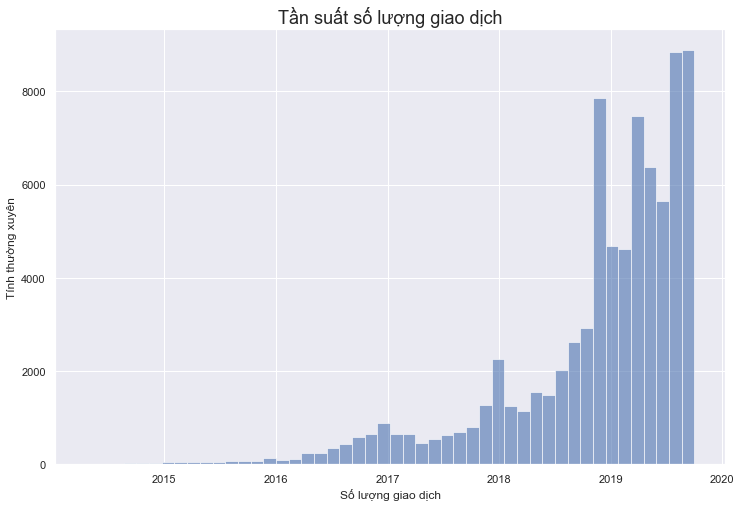

In [95]:
#Histogram count
plt.figure(figsize = (12, 8))

plt.hist(df_merged_ts.index, bins = 48, alpha = 0.6)
plt.title('Tần suất số lượng giao dịch', size = 18)
#plt.xlim('2014', '2019')
plt.xlabel('Số lượng giao dịch')
plt.ylabel('Tính thường xuyên')
plt.show()

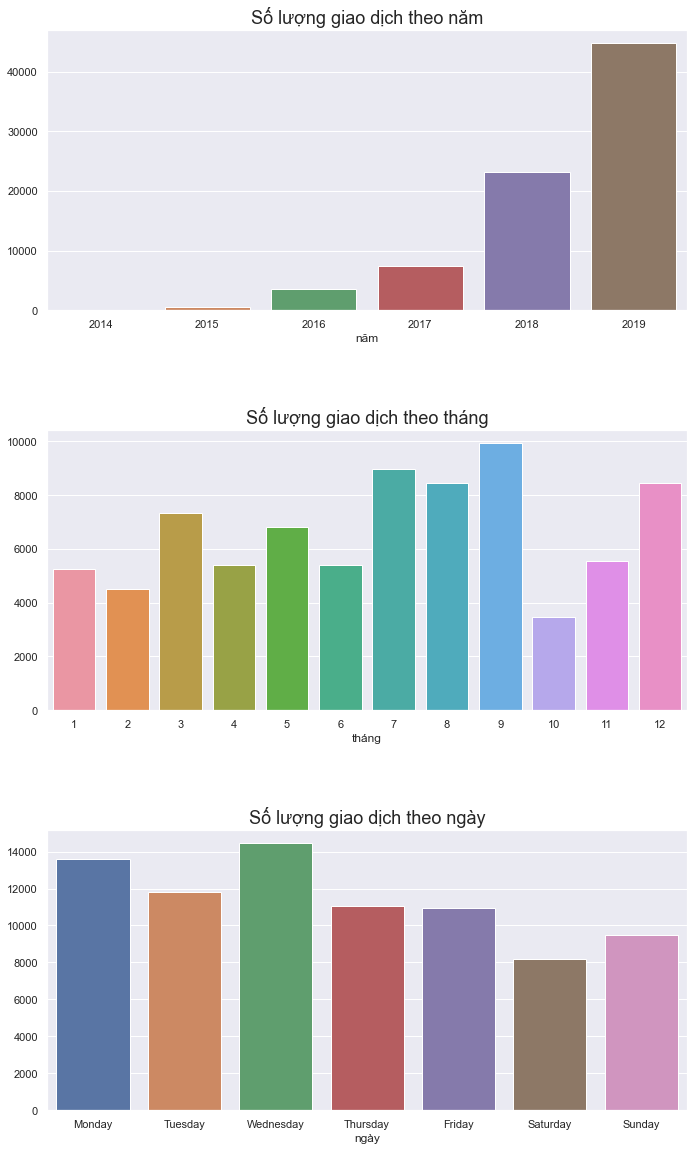

In [96]:
fig, ax = plt.subplots(3, 1, figsize = (12, 18))
fig.tight_layout(pad = 8)

sns.countplot(data = df_merged_ts, x = 'year', ax = ax[0])
ax[0].set_title('Số lượng giao dịch theo năm', size = 18)
ax[0].set_ylabel('')
ax[0].set_xlabel('năm')

sns.countplot(data = df_merged_ts, x = 'month', ax = ax[1])
ax[1].set_title('Số lượng giao dịch theo tháng', size = 18)
ax[1].set_ylabel('')
ax[1].set_xlabel('tháng')

sns.countplot(data = df_merged_ts, x = 'dayname', ax = ax[2], 
              order = [ "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax[2].set_title('Số lượng giao dịch theo ngày', size = 18)
ax[2].set_ylabel('')
ax[2].set_xlabel('ngày')

plt.show()

In [97]:
df_resampled = df_merged[['boughtDate']]
df_resampled.insert(column = 'count', value = 1, loc = 1)
df_resampled.head()
df_resampled = df_resampled.groupby('boughtDate').count()

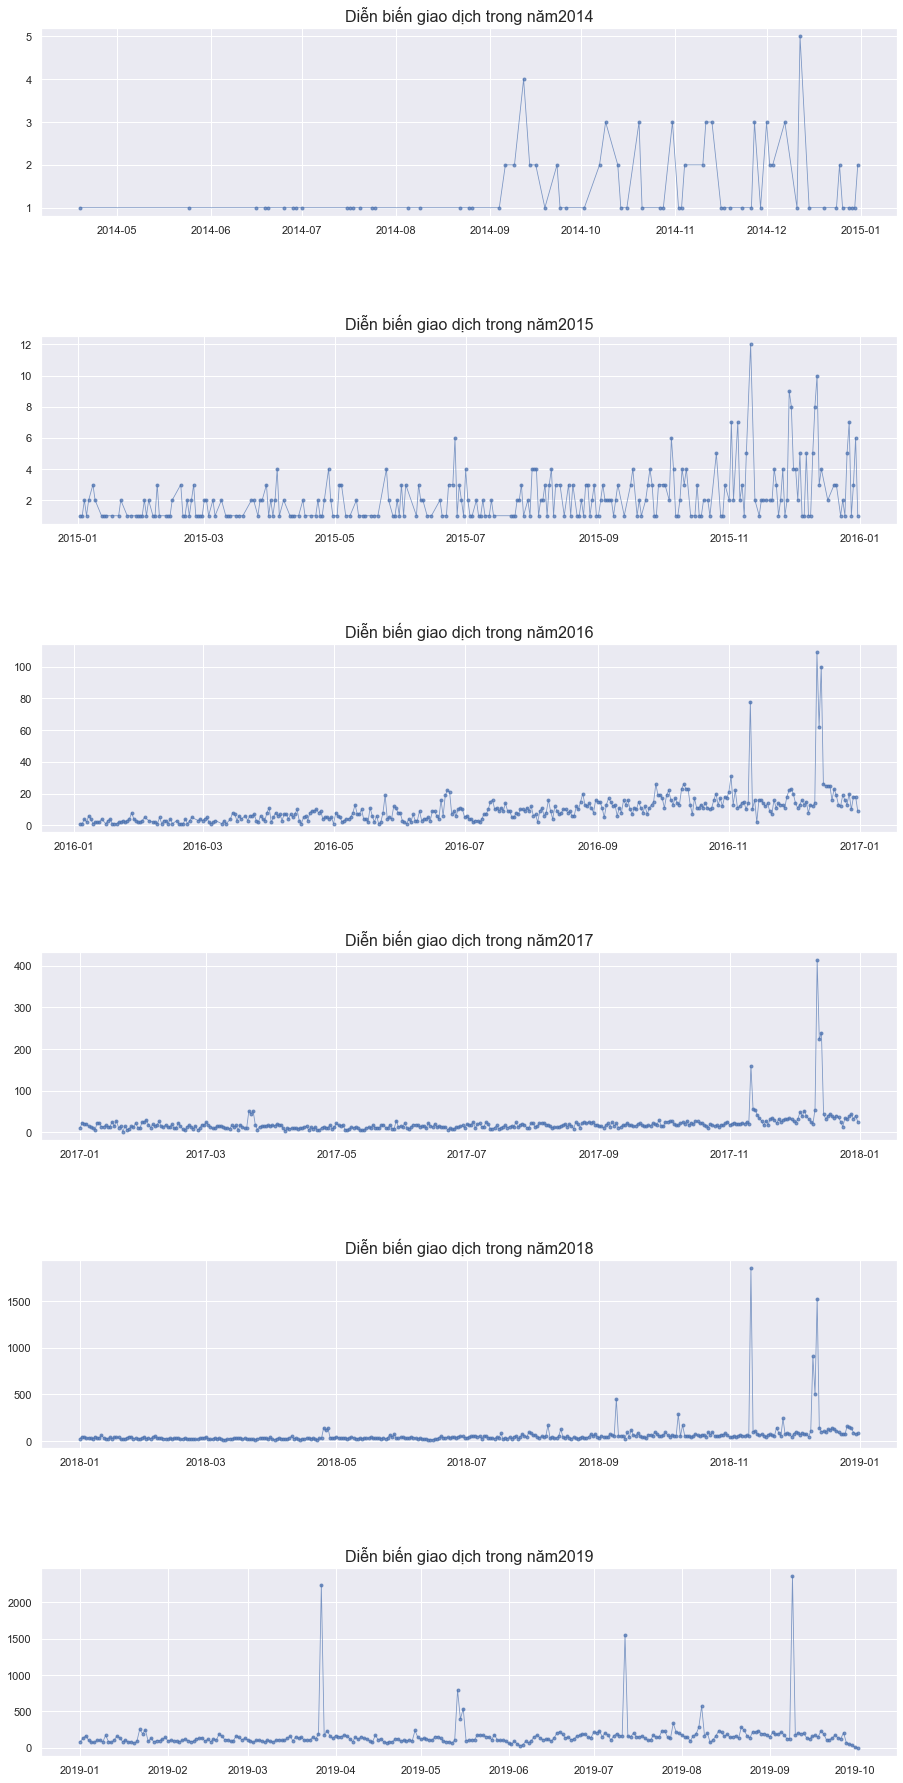

In [98]:
year_list = ['2014', '2015', '2016', '2017', '2018', '2019']

fig, ax = plt.subplots(6,1, figsize = (15, 27))
fig.tight_layout(pad = 8)

for axis, i in zip(ax.flatten(), year_list):
        axis.plot(df_resampled.loc[i, 'count'], linewidth = 0.8, marker = '.', alpha = 0.7)
        axis.set_title('Diễn biến giao dịch trong năm{}'.format(i), size = 16)
        axis.set_xlabel('')
        axis.set_ylabel('')

plt.show()

#### Resampling(Lấy mẫu lại)

In [99]:
#lấy mẫu lại khung dữ liệu số tiền giao dịch
resampled_yearly = df_resampled.resample('Y').sum()
resampled_monthly = df_resampled.resample('M').sum()
resampled_weekly = df_resampled.resample('W').sum()

#lấy mẫu lại khung dữ liệu cho giá trị giao dịch
df_price_resample = df_merged_ts[['price']]
value_weekly = df_price_resample.resample('W').sum()
value_monthly = df_price_resample.resample('M').sum()
value_yearly = df_price_resample.resample('Y').sum()
value_daily = df_price_resample.resample('D').sum()
yearly_mean = df_price_resample.resample('Y').mean()

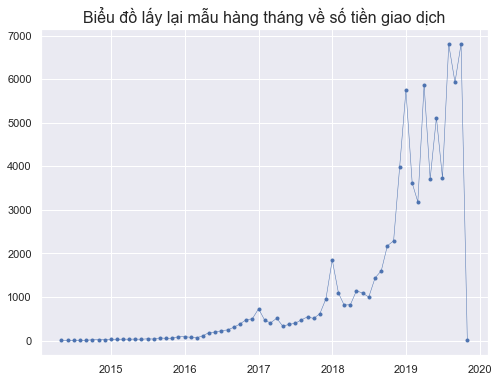

In [100]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(resampled_monthly, marker = '.', linewidth = 0.5)
ax.set_title('Biểu đồ lấy lại mẫu hàng tháng về số tiền giao dịch', size = 16)
plt.show()

##### Dựa trên giá trị giao dịch và số tiền giao dịch

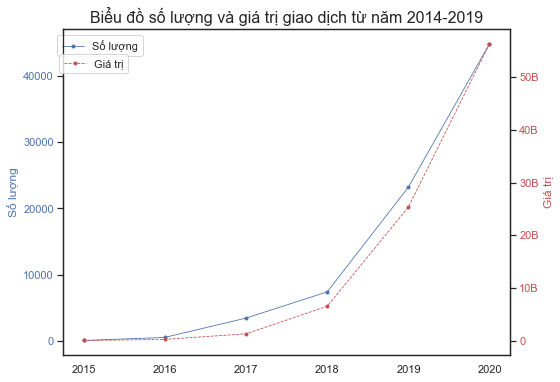

In [109]:
sns.set_style('white')
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(resampled_yearly, marker = '.', linewidth = 0.8, label = 'Số lượng', color = 'b')
ax.set_title('Biểu đồ số lượng và giá trị giao dịch từ năm 2014-2019', size = 16)
ax.set_ylabel('Số lượng', color = 'b')
ax.tick_params(axis = 'y', labelcolor = 'b')
ax.legend(bbox_to_anchor = [0.19, 0.998])

ax1 = ax.twinx()
ax1.plot(value_yearly, linewidth = 0.8, marker = '.', color = 'r', linestyle = '--', label = 'Giá trị')
ax1.set_ylabel('Giá trị', color = 'r')
ax1.tick_params(axis = 'y', labelcolor = 'r')
ax1.yaxis.set_major_formatter(tick.FuncFormatter(large_tick_format))
ax1.legend(bbox_to_anchor = [0.158, 0.94])
plt.show()

plt.show()

###### Lấy mẫu 3 tháng: 2018-06 đến 2018-09
###### Lấy mẫu lại và luân phiên hàng tuần có nghĩa là 7, 30 ngày: số lượng giao dịch

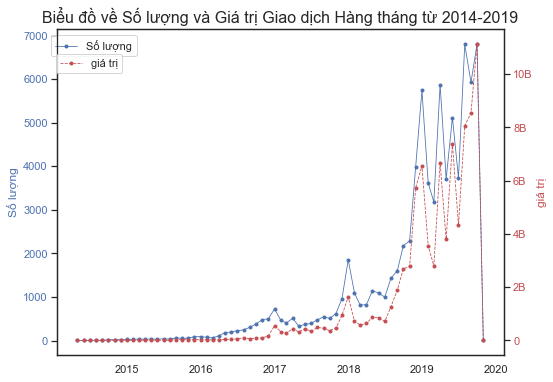

In [106]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(resampled_monthly, marker = '.', linewidth = 0.8, label = 'Số lượng', color = 'b')
ax.set_title('Biểu đồ về Số lượng và Giá trị Giao dịch Hàng tháng từ 2014-2019', size = 16)
ax.set_ylabel('Số lượng', color = 'b')
ax.legend(bbox_to_anchor = [0.19, 0.998])
ax.tick_params(axis = 'y', labelcolor = 'b')

ax1 = ax.twinx()
ax1.plot(value_monthly, linewidth = 0.8, marker = '.', color = 'r', linestyle = '--', label = 'giá trị')
ax1.set_ylabel('giá trị', color = 'r')
ax1.tick_params(axis = 'y', labelcolor = 'r')
ax1.legend(bbox_to_anchor = [0.158, 0.94])
ax1.yaxis.set_major_formatter(tick.FuncFormatter(large_tick_format))
plt.show()

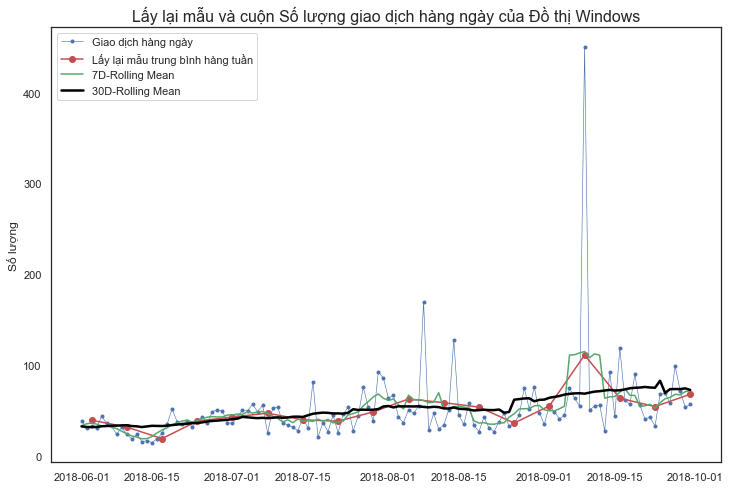

In [48]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(df_resampled.loc['2018-06' : '2018-09', 'count'], linewidth = 0.6, marker = '.', label = 'Giao dịch hàng ngày')
ax.plot(df_resampled.resample('W').mean().loc['2018-06' : '2018-09', 'count'], color = 'r', marker = 'o',
        label = 'Lấy lại mẫu trung bình hàng tuần')
ax.plot(df_resampled.rolling(7, center = True).mean().loc['2018-06' : '2018-09', 'count'], 
        label = '7D-Rolling Mean', color = 'g')
ax.plot(df_resampled.rolling(30, center = True).mean().loc['2018-06' : '2018-09', 'count'], 
        label = '30D-Rolling Mean', color = 'black', linewidth = 2.5)
ax.set_ylabel('Số lượng')
ax.legend()
ax.set_title('Lấy lại mẫu và cuộn Số lượng giao dịch hàng ngày của Đồ thị Windows', size = 16)
plt.show()

###### Lấy mẫu lại và luân phiên hàng tuần có nghĩa là 7, 30 ngày: giá trị giao dịch

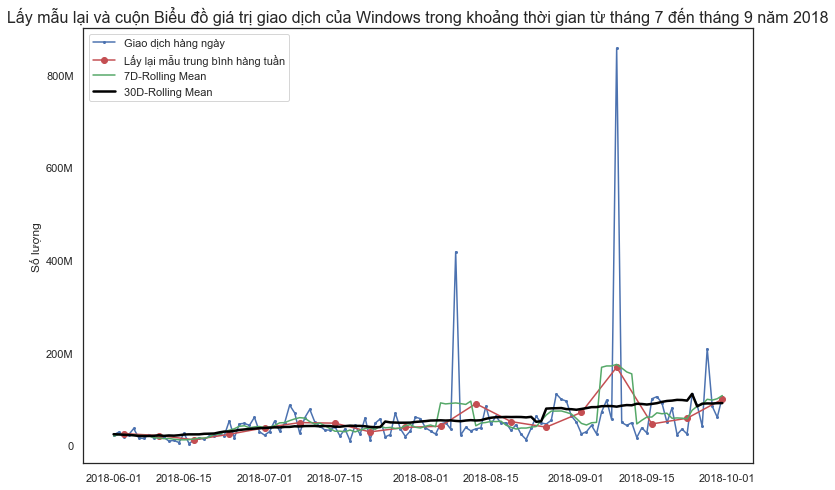

In [108]:
df_price_resample_ = df_price_resample.groupby(df_price_resample.index)[['price']].sum()

fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(df_price_resample_.loc['2018-06' : '2018-09', 'price'], linestyle = '-', 
        marker = '.', label = 'Giao dịch hàng ngày', markersize = 4)
ax.plot(df_price_resample_.resample('W').mean().loc['2018-06' : '2018-09', 'price'], color = 'r', marker = 'o',
        label = 'Lấy lại mẫu trung bình hàng tuần')
ax.plot(df_price_resample_.rolling(7, center = True).mean().loc['2018-06' : '2018-09', 'price'], 
        label = '7D-Rolling Mean', color = 'g')
ax.plot(df_price_resample_.rolling(30, center = True).mean().loc['2018-06' : '2018-09', 'price'], 
        label = '30D-Rolling Mean', color = 'black', linewidth = 2.5)
ax.set_ylabel('Số lượng')
ax.yaxis.set_major_formatter(tick.FuncFormatter(large_tick_format))
ax.set_title('Lấy mẫu lại và cuộn Biểu đồ giá trị giao dịch của Windows trong khoảng thời gian từ tháng 7 đến tháng 9 năm 2018', size = 16)
ax.legend()
plt.show()

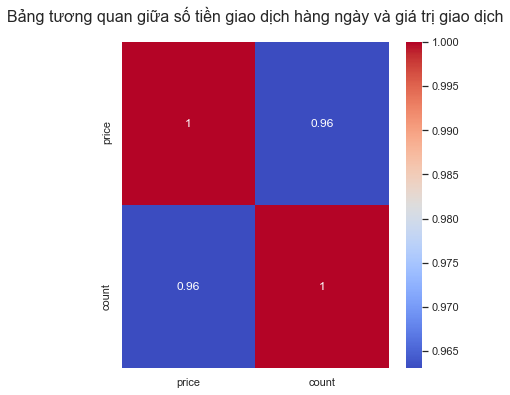

In [50]:
df_merged_ts = df_merged_ts.groupby(df_merged_ts.index)[['price', 'count']].sum()

plt.figure(figsize = (6, 6))

sns.heatmap(cbar = True, annot = True, data = df_merged_ts.corr(), cmap = 'coolwarm')
plt.title('Bảng tương quan giữa số tiền giao dịch hàng ngày và giá trị giao dịch', size = 16, pad = 20)
plt.show()